# Let's check your red wine quality...
We have given various features (like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) which will help us in predicting the quality of wine.

<img src = "https://www.calaiswine.co.uk/wp/wp-content/uploads/2015/12/wine-gif-2.gif" width=500px >


**Problem Statement : ** Predicting red wine quality using various features of red wine.

**Solution to the problem : **

1. [Import Libraries](#1)
2. [Load Data](#2)
    * [Checking the information about each data column](#3)     
3. [Data Visualuzation](#4)
    * [Barplot between `quality` and `fixed acidity`](#5)
    * [Barplot between `quality` and `volatile acidity`](#6)
    * [Barpolt between `quality` and `citric acid`](#7)
    * [Barplot between `quality` and `residual sugar`](#8)
    * [Barplot between `quality` and `chlorides`](#9)
    * [Barplot between `quality` and `free sulfur dioxide`](#10)
    * [Barplot between `quality` and `total sulfur dioxide`](#11)
    * [Barplot between `quality` and `sulphates`](#12)
    * [Barplot between `quality` and `alcohol`](#13)
    * [Conclusion by visualization](#14)
4. [Data Preprocessing](#15)
    * [Creating new column `review`](#16)
    * [Checking unique values for column `review`](#17)
    * [Scaling the data using StandardScaler for PCA](#18)
    * [Viewing the data using StandardScaler](#19)
    * [Proceed to perform PCA](#20)
    * [Ploting the graph to find the principal components](#21)
5. [Splitting data into Train and Test](#22)
    * [Checking for shape of splitted data](#23)
6. [Data Modelling](#24)
    * [Logistic Regression](#25)
    * [Decision Trees](#26)
    * [Naive Bayes](#27)
    * [Random Forests](#28)
    * [SVM](#29) 
    * [Accuracy for different algorithms](#30)

## 1. Import Libraries<a id="1"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

## 2. Load Data <a id="2"></a>

In [2]:
wine = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking the information about each data column<a id="3"></a>

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 3. Data Visualization<a id="4"></a>
Now, I am going to visualize this data to see how the data is distributed.

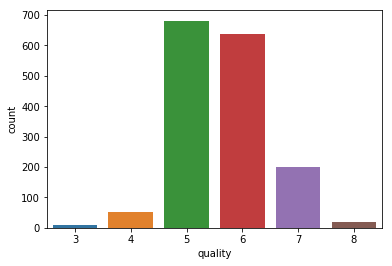

In [5]:
sns.countplot(x='quality',data=wine)

### Barplot between `quality` and `fixed acidity`<a id="5"></a>

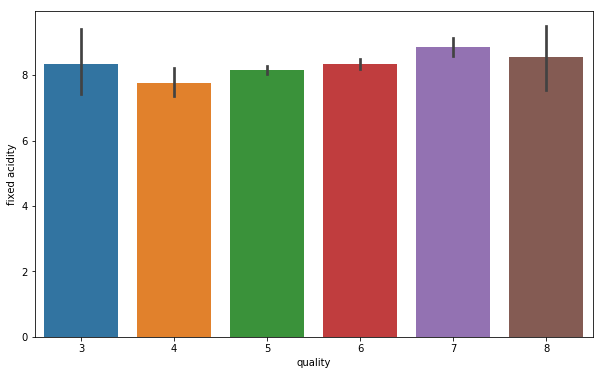

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

Here, we see that `fixed acidity` does not give any specification to classify the `quality`.

### Barplot between `quality` and `volatile acidity`<a id="6"></a>

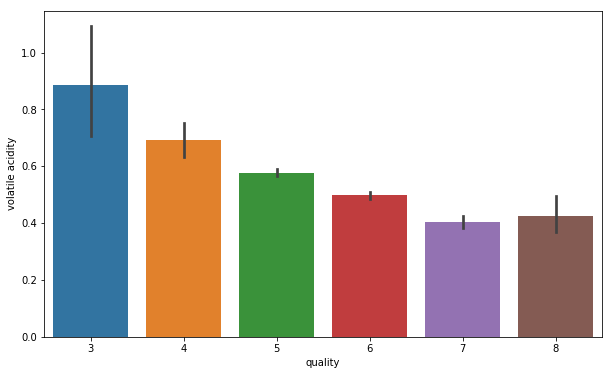

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine)

Here, we see that it's quite a downing trend in the `volatile acidity` as we go higher the `quality`.

### Barpolt between `quality` and `citric acid`<a id="7"></a>

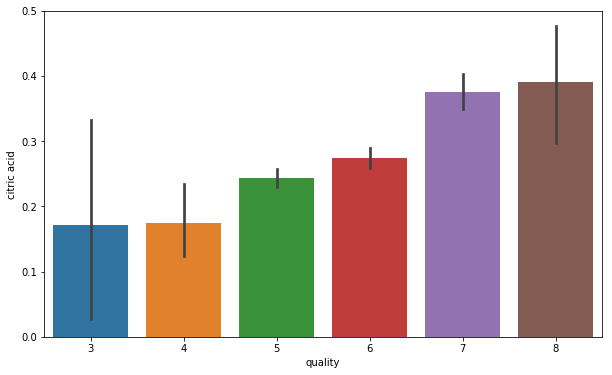

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='citric acid', data=wine)

Here, we see the increasing trend of `citric acid`. That is, as we go higher in `quality` of wine the composition of `citric acid` in wine also increases.

### Barplot between `quality` and `residual sugar`<a id="8"></a>

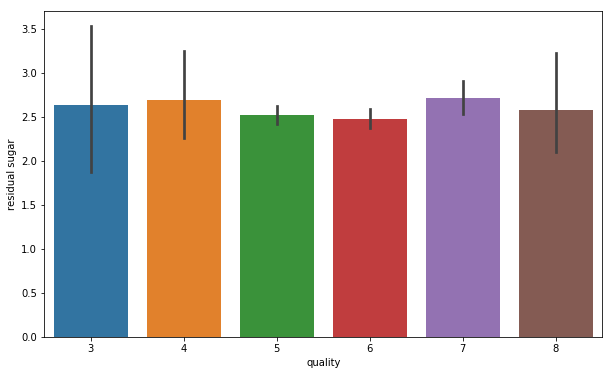

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='residual sugar', data=wine)

Well, there is no significant effect of `residual sugar` on `quality` of wine.

### Barplot between `quality` and `chlorides`<a id="9"></a>

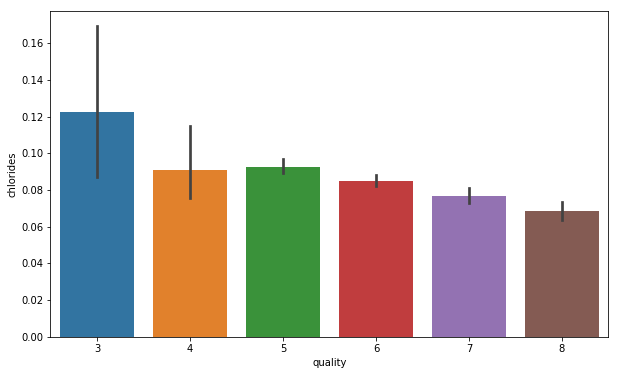

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='chlorides', data=wine)

Here, we see the decreasing trend of `chlorides` with the increase in the `quality` of wine.

### Barplot between `quality` and `free sulfur dioxide`<a id="10"></a>

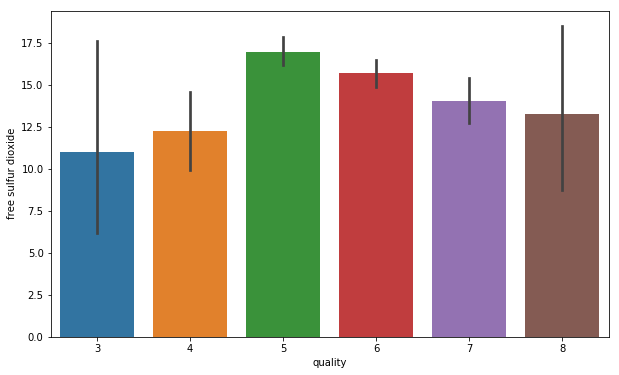

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

### Barplot between `quality` and `total sulfur dioxide`<a id="11"></a>

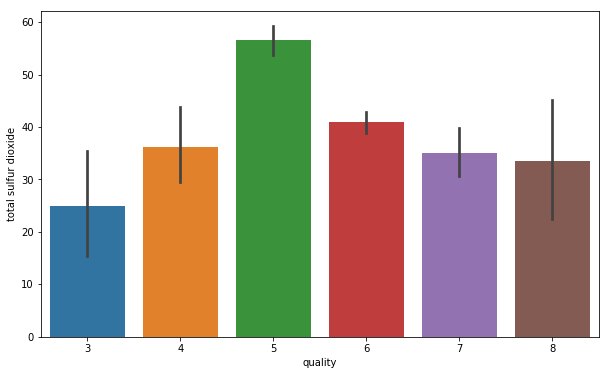

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

Both the `free sulphur dioxide` and `total sulphur dioxide` are comparatively more in the 5th and 6th `quality` wine.

### Barplot between `quality` and `sulphates`<a id="12"></a>

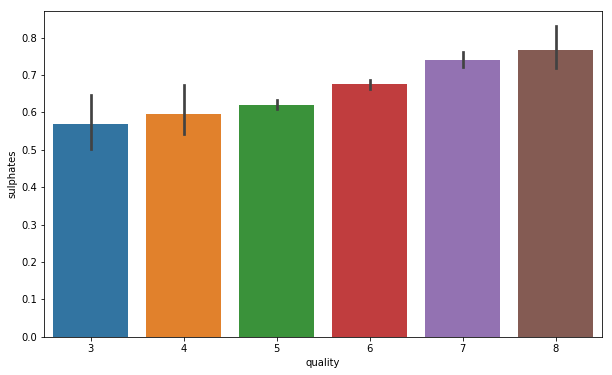

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='sulphates', data=wine)

Ohh yeah, here we the the increasing trend of `sulphates` as we go higher in `quality` of wine.

### Barplot between `quality` and `alcohol`<a id="13"></a>

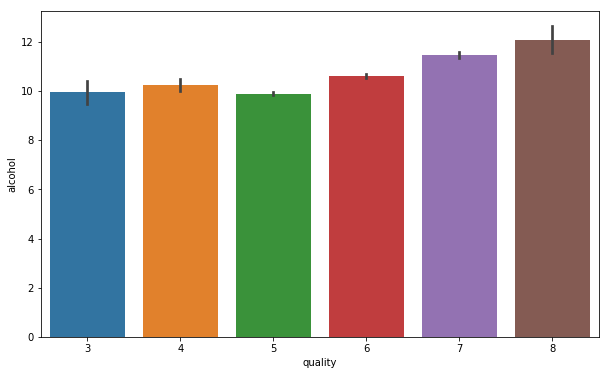

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='alcohol', data=wine)

Here, is also a increasing trend found between `quality` and `alcohol`.

### Overall conclusion by examining data.<a id="14"></a>
Some features have great impact on `quality` of wine and some does not have any sigificant effect in the `quality`.

**Trends**
1. fixed acidity : No significant effect
2. volatile acidity : Decreasing
3. citric acid : Increasing
4. residual sugar : No significant effect
5. chlorides : Decreasing
6. free sulphur dioxide : No significant effect
7. total sulphur dioxide : No significant effect
8. sulphates : Increasing
9. alcohol : Increasing

## 4. Data Preprocessing<a id=15></a>

### Creating new column `review`<a id=16></a>

>Now, we will create a new column called review. This column will contain the values of 1, 2 and 3 and will be split in the following way.
* review ==> quality ==> meaning
* 1 ==> 1, 2, 3 ==>Bad
* 2 ==> 4, 5, 6, 7 ==> Average
* 3 ==> 8, 9, 10 ==> Excellent

In [15]:
reviews = []
for i in wine['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
wine['Reviews'] = reviews

In [16]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

### Checking unique values for column `review`<a id=17></a>

In [17]:
wine['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [18]:
Counter(wine['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [19]:
X = wine.iloc[:,:11]
y = wine['Reviews']

In [20]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Reviews, dtype: object

### Scaling the data using StandardScaler for PCA<a id=18></a>

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Viewing the data using StandardScaler<a id=19></a>

In [23]:
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


### Proceed to perform PCA<a id=20></a>

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

### Ploting the graph to find the principal components<a id=21></a>

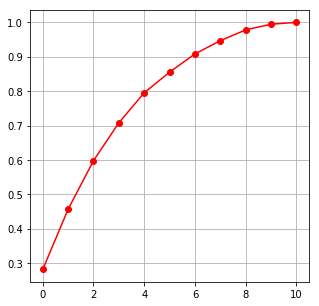

In [25]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [26]:
#As per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

In [27]:
print(X_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


## 5. Splitting the dataset into train and test data.<a id=22></a>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)

### Checking for shape of splitted data<a id=23></a>

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 8)
(400, 8)
(1199,)
(400,)


## 6. Data Modelling<a id=24></a>
We will use the following algorithms ==>
1. Logistic Regression
2. Decision Trees
3. Naive Bayes
4. Random Forests
5. SVM

### Logistic Regression<a id=25></a>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [31]:
# print confusion matrix and accuracy score
lr_confusion_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy_score = accuracy_score(y_test, lr_predict)
print(lr_confusion_matrix)
print(lr_accuracy_score*100)

[[396   0]
 [  4   0]]
99.0


98.5% accuracy with Logistic Regression! Let's see of Decision Trees give us a better accuracy.

### Decision Tree<a id=26></a>

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [33]:
#print confusion matrix and accuracy score
dt_confusion_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)
print(dt_confusion_matrix)
print(dt_accuracy_score*100)

[[  0   0   0]
 [  2 390   4]
 [  0   4   0]]
97.5


97% accuracy with Decision Tree! Let's use NaiveBayes

### Naive Bayes<a id=27></a>

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)

In [35]:
#print confusion matrix and accuracy score
nb_confusion_matrix = confusion_matrix(y_test, nb_predict)
nb_accuracy_score = accuracy_score(y_test, nb_predict)
print(nb_confusion_matrix)
print(nb_accuracy_score*100)

[[  0   0   0]
 [  4 391   1]
 [  0   4   0]]
97.75


97.75% accuracy with Naive Bayes.

### Random Forest Classifier<a id=28></a>

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [37]:
# print confusion matrix and accuracy score
rf_confusion_matrix = confusion_matrix(y_test, rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)
print(rf_confusion_matrix)
print(rf_accuracy_score*100)

[[396   0]
 [  4   0]]
99.0


98.25% accuracy with Random forest.

### Support Vector Machine (SVM)<a id=29></a>

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

In [39]:
#print confusion matrix and accuracy score
svc_confusion_matrix = confusion_matrix(y_test, rf_predict)
svc_accuracy_score = accuracy_score(y_test, rf_predict)
print(svc_confusion_matrix)
print(svc_accuracy_score*100)

[[396   0]
 [  4   0]]
99.0


#### Accuracy for different algorithms:<a id=30></a>

* Logistic Regression = 98.5% accuracy  
* Decision Trees = 97% accuracy
* Naive Bayes = 97.75% accuracy
* Random Forest = 98.25% accuracy
* SVM = 98.25% accuracy

In [40]:
wine1 = [[7.8, 0.760, 0.04, 2.3, 0.092, 15.0, 54.0, 0.99700]]
print("Decision Tree : ",dt.predict(wine1))
print("Logistic Regression : ",lr.predict(wine1))
print("Naive Bayes : ",nb.predict(wine1))
print("Random forest : ",rf.predict(wine1))
print("SVM : ",svc.predict(wine1))

Decision Tree :  ['2']
Logistic Regression :  ['2']
Naive Bayes :  ['1']
Random forest :  ['2']
SVM :  ['2']


Well, Naive Bayes did wrong prediction! Therefore, in this way we can predict the quality of red wine using **Logistic regression** because it gives highest accuracy.